Part 1: Creating the GitHub Repo

In [31]:
pip install ucimlrepo

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo 
  
# Fetching the dataset 
automobile = fetch_ucirepo(id=10)

In [33]:
# Overview of the entire automobile dataset
automobile.data.features

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,168.8,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,171.2,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,176.6,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,176.6,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,28,23,5400.0,114.0,9.5,3.15,3.78,mpfi,141,...,188.8,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0
201,19045.0,25,19,5300.0,160.0,8.7,3.15,3.78,mpfi,141,...,188.8,109.1,front,rwd,sedan,4.0,turbo,gas,volvo,95.0
202,21485.0,23,18,5500.0,134.0,8.8,2.87,3.58,mpfi,173,...,188.8,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0
203,22470.0,27,26,4800.0,106.0,23.0,3.40,3.01,idi,145,...,188.8,109.1,front,rwd,sedan,4.0,turbo,diesel,volvo,95.0


Part 2: Performing Initial EDA, Data Wrangling and Pre-Processing 

In [34]:
print("\nSample of the Dataset:")
automobile.data.features.sample(5)

# More to come.


Sample of the Dataset:


,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses
81,8499.0,32,25,5000.0,88.0,8.5,3.46,3.35,2bbl,122,...,173.0,96.3,front,fwd,hatchback,2.0,std,gas,mitsubishi,153.0
40,10295.0,33,27,5800.0,86.0,9.0,3.58,3.15,1bbl,110,...,175.4,96.5,front,fwd,sedan,4.0,std,gas,honda,85.0
58,15645.0,23,16,6000.0,135.0,9.4,NaN,NaN,mpfi,80,...,169.0,95.3,front,rwd,hatchback,2.0,std,gas,mazda,150.0
30,6479.0,54,49,4800.0,58.0,9.6,3.41,2.91,1bbl,92,...,144.6,86.6,front,fwd,hatchback,2.0,std,gas,honda,137.0
26,7609.0,38,31,5500.0,68.0,9.4,3.23,2.97,2bbl,90,...,157.3,93.7,front,fwd,sedan,4.0,std,gas,dodge,148.0


In [35]:
# Check data types and missing values

print("\nData Types:")
automobile.data.features.dtypes


Data Types:


price                float64
highway-mpg            int64
city-mpg               int64
peak-rpm             float64
horsepower           float64
compression-ratio    float64
stroke               float64
bore                 float64
fuel-system           object
engine-size            int64
num-of-cylinders       int64
engine-type           object
curb-weight            int64
height               float64
width                float64
length               float64
wheel-base           float64
engine-location       object
drive-wheels          object
body-style            object
num-of-doors         float64
aspiration            object
fuel-type             object
make                  object
normalized-losses    float64
dtype: object

In [36]:
# Checking the missing values as listed on the UCI website

print("\nMissing Values:")
automobile.data.features.isnull().sum()


Missing Values:


price                 4
highway-mpg           0
city-mpg              0
peak-rpm              2
horsepower            2
compression-ratio     0
stroke                4
bore                  4
fuel-system           0
engine-size           0
num-of-cylinders      0
engine-type           0
curb-weight           0
height                0
width                 0
length                0
wheel-base            0
engine-location       0
drive-wheels          0
body-style            0
num-of-doors          2
aspiration            0
fuel-type             0
make                  0
normalized-losses    41
dtype: int64

In [37]:
# Summary statistics

print("\nSummary Statistics:")
automobile.data.features.describe(include='all')


Summary Statistics:


,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,length,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses
count,201.000000,205.000000,205.000000,203.000000,203.000000,205.000000,201.000000,201.000000,205,205.000000,...,205.000000,205.000000,205,205,205,203.000000,205,205,205,164.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,NaN,...,NaN,NaN,2,3,5,NaN,2,2,22,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mpfi,NaN,...,NaN,NaN,front,fwd,sedan,NaN,std,gas,toyota,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94,NaN,...,NaN,NaN,202,120,96,NaN,168,185,32,NaN
mean,13207.129353,30.751220,25.219512,5125.369458,104.256158,10.142537,3.255423,3.329751,NaN,126.907317,...,174.049268,98.756585,NaN,NaN,NaN,3.123153,NaN,NaN,NaN,122.000000
std,7947.066342,6.886443,6.542142,479.334560,39.714369,3.972040,0.316717,0.273539,NaN,41.642693,...,12.337289,6.021776,NaN,NaN,NaN,0.994841,NaN,NaN,NaN,35.442168
min,5118.000000,16.000000,13.000000,4150.000000,48.000000,7.000000,2.070000,2.540000,NaN,61.000000,...,141.100000,86.600000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,65.000000
25%,7775.000000,25.000000,19.000000,4800.000000,70.000000,8.600000,3.110000,3.150000,NaN,97.000000,...,166.300000,94.500000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,94.000000
50%,10295.000000,30.000000,24.000000,5200.000000,95.000000,9.000000,3.290000,3.310000,NaN,120.000000,...,173.200000,97.000000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,115.000000
75%,16500.000000,34.000000,30.000000,5500.000000,116.000000,9.400000,3.410000,3.590000,NaN,141.000000,...,183.100000,102.400000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,150.000000


In [38]:
print("\nUnique Values in the Columns:")
categorical_columns = automobile.variables[automobile.variables['type'] == 'Categorical']['name'].tolist()
for column in categorical_columns:
    print(column, ":")
    print(automobile.data.features[column].value_counts())
    print("\n")


Unique Values in the Columns:
fuel-system :
fuel-system
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64


engine-type :
engine-type
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64


drive-wheels :
drive-wheels
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64


body-style :
body-style
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64


make :
make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1

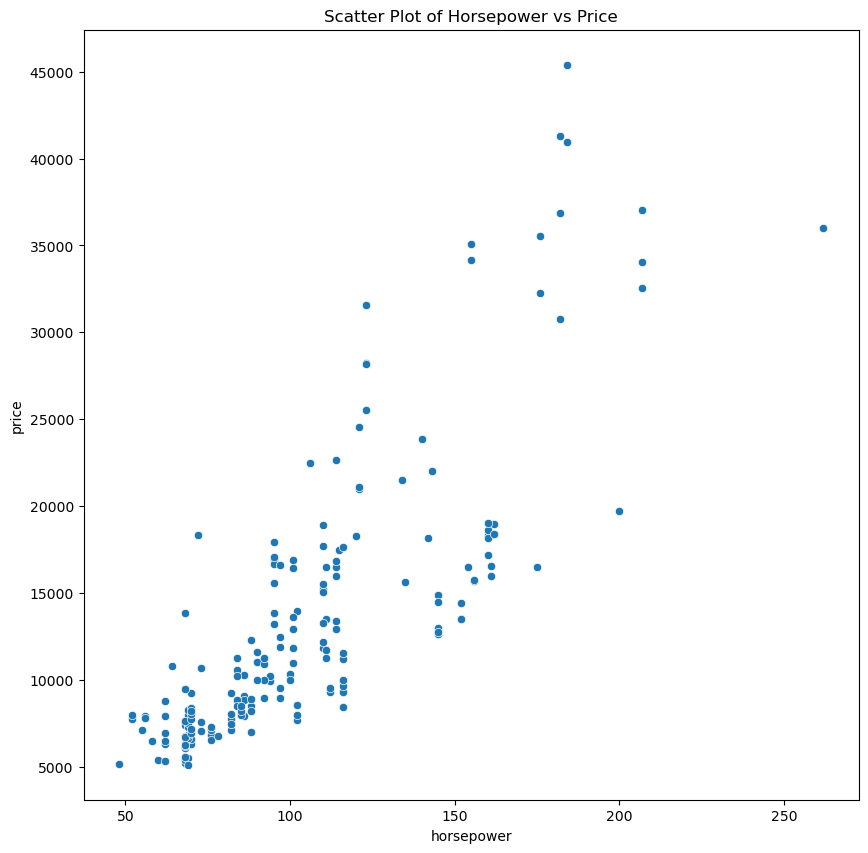

In [39]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=automobile.data.features['horsepower'], y=automobile.data.features['price'])
plt.title('Scatter Plot of Horsepower vs Price')
plt.show()

In [40]:
# Handle missing values
# Replacing missing values in 'normalized-losses' with the mean (122.0)
automobile.data.features.loc[:, 'normalized-losses'] = automobile.data.features['normalized-losses'].fillna(automobile.data.features['normalized-losses'].mean())

In [41]:
automobile.data.features['normalized-losses'].mean()


122.0

In [42]:
# Next drop null values and columns we do not want. Can continue EDA process if we want with more columns.
# For part 3, compare the "price" var to other vars in out dataframe to create our model and analyze it.

In [43]:
automobile.data.features['body-style']

0      convertible
1      convertible
2        hatchback
3            sedan
4            sedan
          ...     
200          sedan
201          sedan
202          sedan
203          sedan
204          sedan
Name: body-style, Length: 205, dtype: object

In [44]:
body_style_counts=automobile.data.features['body-style'].value_counts().reset_index()

In [45]:
print(body_style_counts)

    body-style  count
0        sedan     96
1    hatchback     70
2        wagon     25
3      hardtop      8
4  convertible      6


<Axes: xlabel='body-style'>

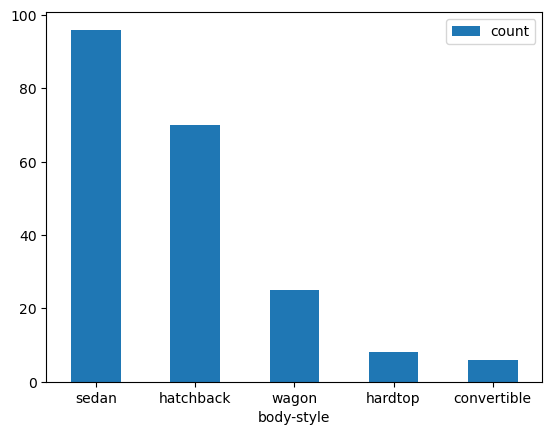

In [46]:
body_style_counts.plot.bar(x='body-style',y='count', rot=0)

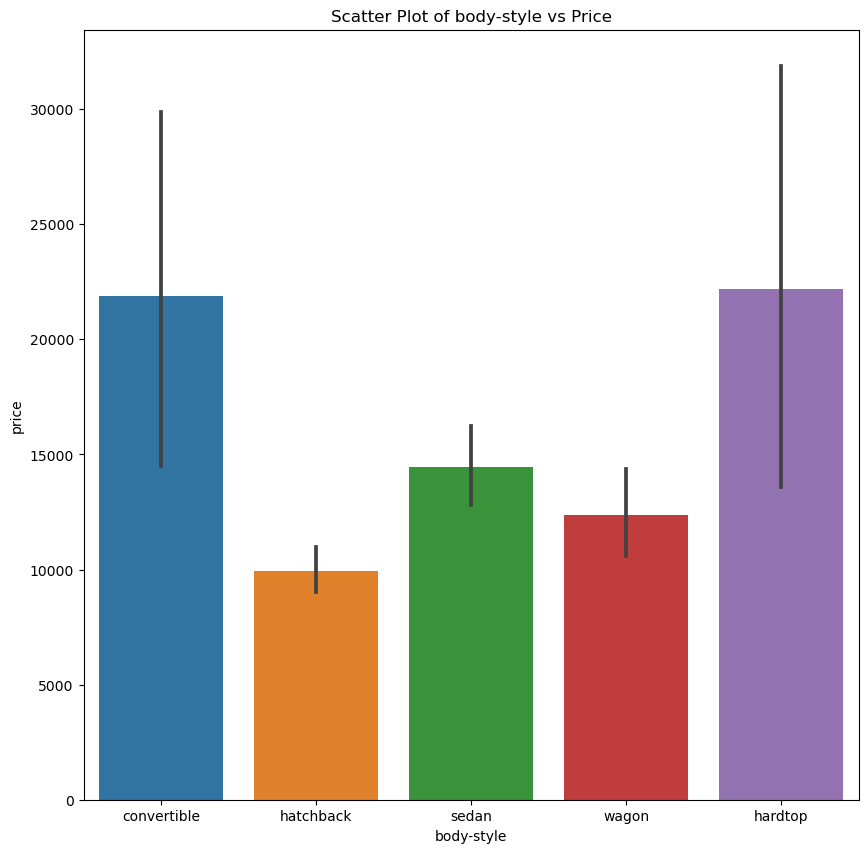

In [47]:
plt.figure(figsize=(10, 10))
sns.barplot(x=automobile.data.features['body-style'], y=automobile.data.features['price'])
plt.title('Scatter Plot of body-style vs Price')
plt.show()

<Axes: xlabel='body-style', ylabel='price'>

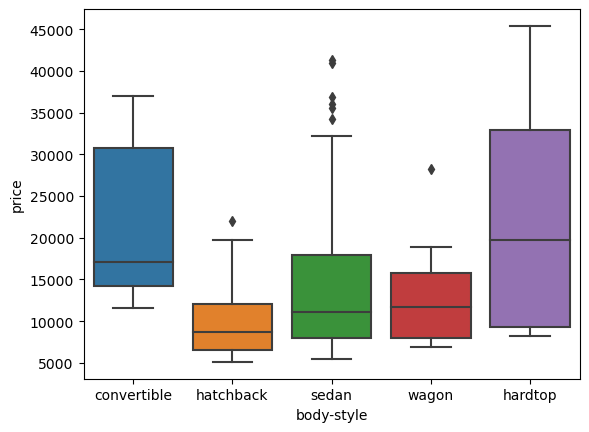

In [62]:
sns.boxplot(data=automobile.data.features, x="body-style", y="price")

In [48]:
sns.barplot

<function seaborn.categorical.barplot(data=None, *, x=None, y=None, hue=None, order=None, hue_order=None, estimator='mean', errorbar=('ci', 95), n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, errcolor='.26', errwidth=None, capsize=None, dodge=True, ci='deprecated', ax=None, **kwargs)>

In [49]:
drive_wheels_counts=automobile.data.features['drive-wheels'].value_counts().reset_index()
print(drive_wheels_counts)

  drive-wheels  count
0          fwd    120
1          rwd     76
2          4wd      9


<Axes: xlabel='drive-wheels'>

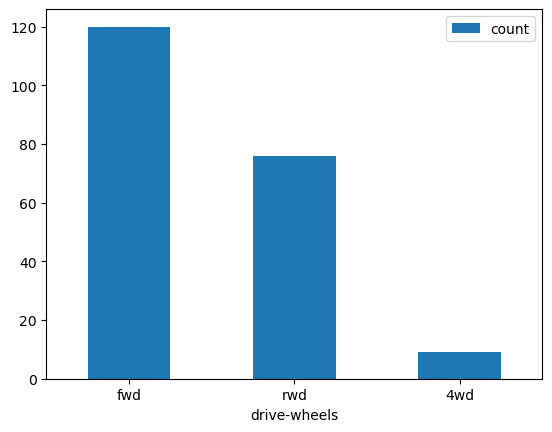

In [50]:
drive_wheels_counts.plot.bar(x='drive-wheels',y='count', rot=0)

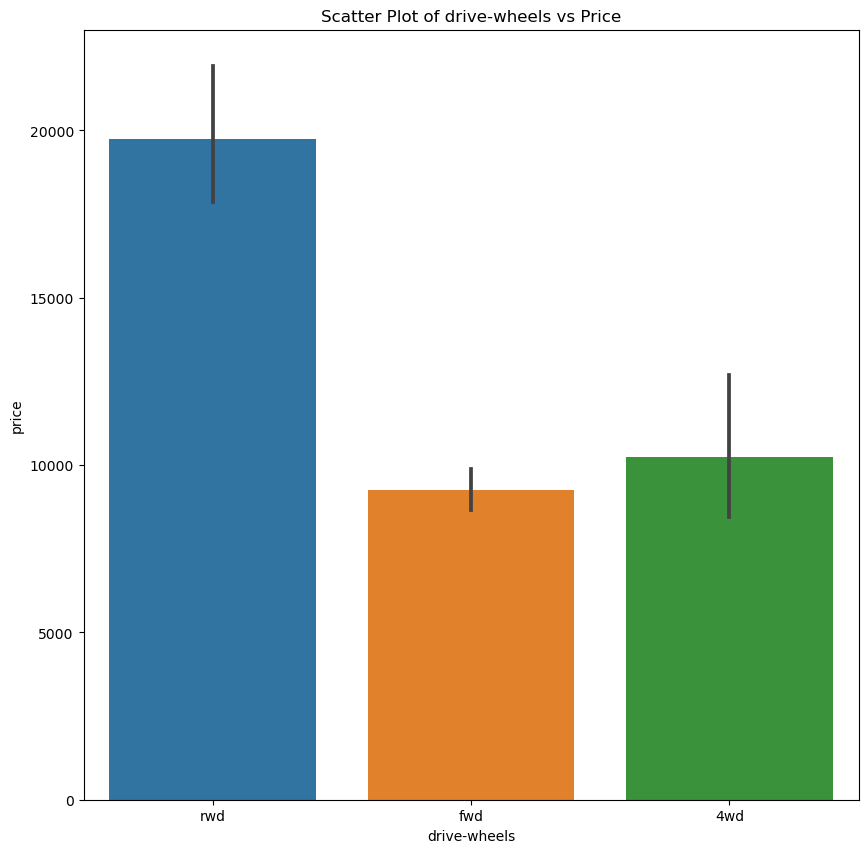

In [60]:
plt.figure(figsize=(10, 10))
sns.barplot(x=automobile.data.features['drive-wheels'], y=automobile.data.features['price'])
plt.title('Scatter Plot of drive-wheels vs Price')
plt.show()

<Axes: xlabel='drive-wheels', ylabel='price'>

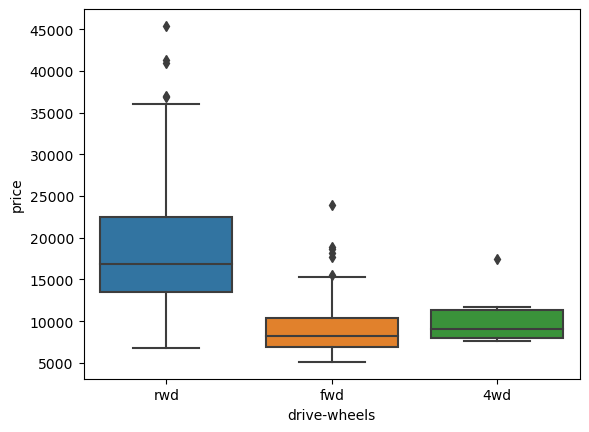

In [63]:
sns.boxplot(data=automobile.data.features, x="drive-wheels", y="price")

In [52]:
engine_location_counts=automobile.data.features['engine-location'].value_counts().reset_index()
print(engine_location_counts)

  engine-location  count
0           front    202
1            rear      3


<Axes: xlabel='engine-location'>

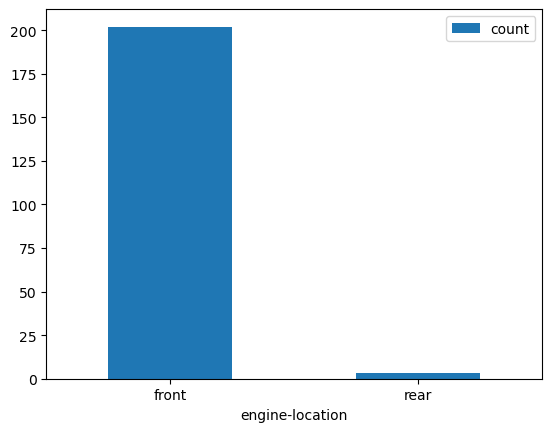

In [53]:
engine_location_counts.plot.bar(x='engine-location',y='count', rot=0)

In [54]:
wheel_base_counts=automobile.data.features['wheel-base'].value_counts().reset_index()
print(wheel_base_counts)

    wheel-base  count
0         94.5     21
1         93.7     20
2         95.7     13
3         96.5      8
4         97.3      7
5         98.4      7
6        104.3      6
7        100.4      6
8        107.9      6
9         98.8      6
10        99.1      6
11        96.3      6
12       109.1      5
13        93.1      5
14        97.2      5
15        95.9      5
16       102.4      5
17        97.0      4
18        95.3      4
19       114.2      4
20       101.2      4
21       110.0      3
22       103.5      3
23        89.5      3
24       105.8      3
25        96.1      2
26       102.9      2
27       104.5      2
28        91.3      2
29        96.9      2
30        88.6      2
31       113.0      2
32        99.8      2
33       115.6      2
34       103.3      2
35        86.6      2
36       104.9      2
37        93.3      1
38        99.4      1
39        99.5      1
40        88.4      1
41        94.3      1
42        96.0      1
43        95.1      1
44        

<Axes: ylabel='wheel-base'>

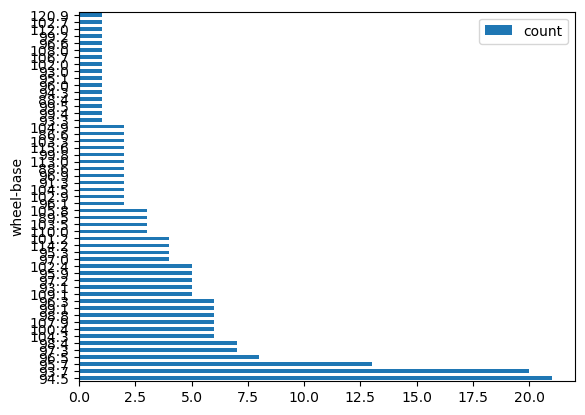

In [55]:

wheel_base_counts.plot.barh(x='wheel-base',y='count', rot=0)

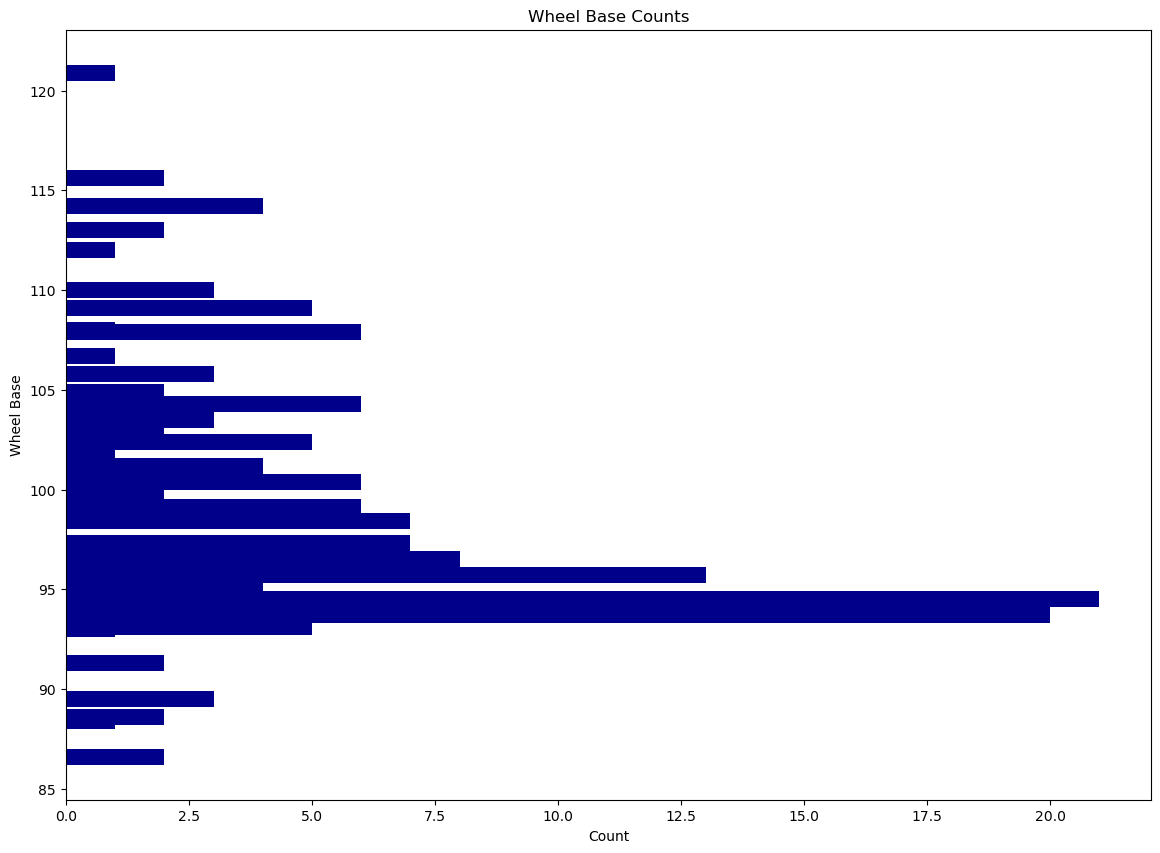

In [56]:

wheel_base_counts.columns = ['wheel-base', 'count'] 

plt.figure(figsize=(14, 10))  
plt.barh(wheel_base_counts['wheel-base'], wheel_base_counts['count'], color='darkblue')
plt.xlabel('Count')
plt.ylabel('Wheel Base')
plt.title('Wheel Base Counts')
plt.show()

In [57]:
length_counts=automobile.data.features['length'].value_counts().reset_index()
print(length_counts)

    length  count
0    157.3     15
1    188.8     11
2    171.7      7
3    186.7      7
4    166.3      7
..     ...    ...
70   165.6      1
71   187.5      1
72   180.3      1
73   208.1      1
74   199.2      1

[75 rows x 2 columns]


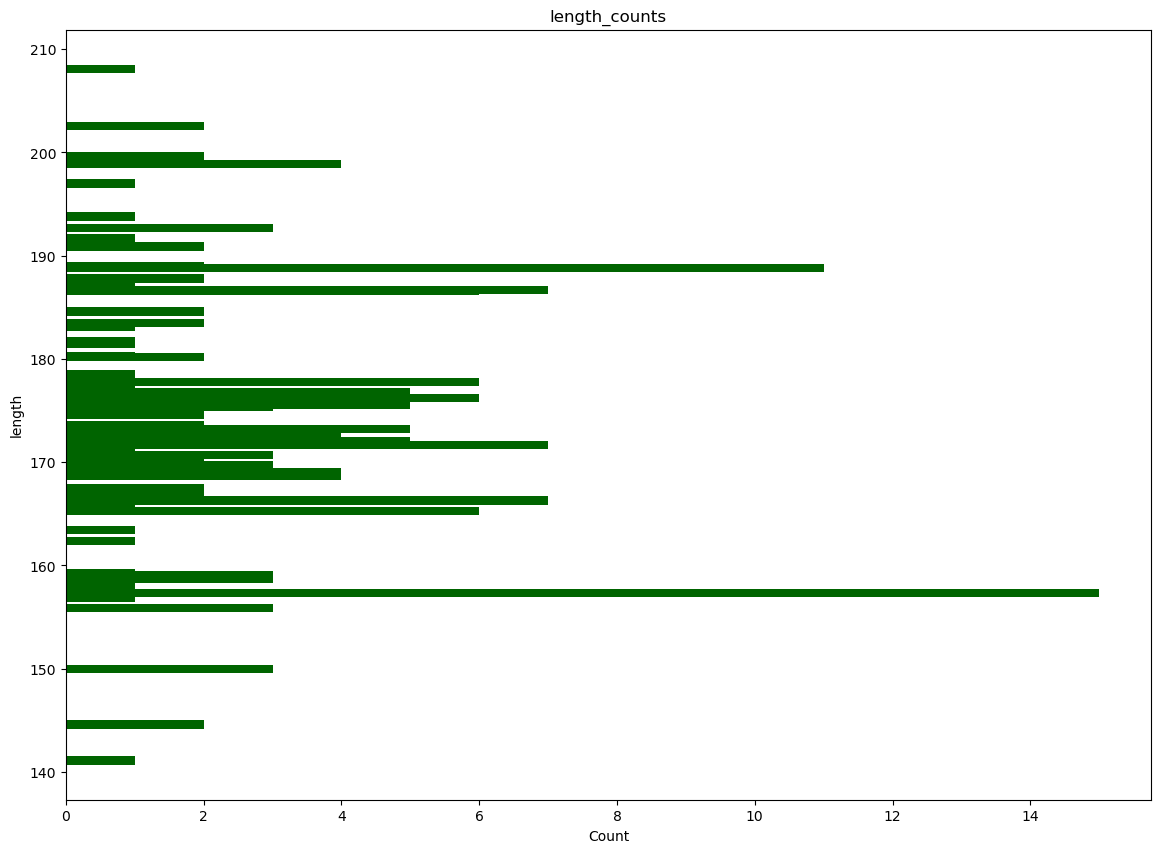

In [58]:
length_counts.columns = ['length', 'count']  

plt.figure(figsize=(14, 10))  
plt.barh(length_counts['length'], length_counts['count'], color='darkgreen')
plt.xlabel('Count')
plt.ylabel('length')
plt.title('length_counts')
plt.show()